In [1]:
# for basic operations
import numpy as np 
import pandas as pd 

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

data = pd.read_csv('C:/Users/Kai/Desktop/Assignment3/data/breast-w_preproccess.csv')

# for basic operations
import numpy as np 
import pandas as pd 

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


data = pd.read_csv('C:/Users/Kai/Desktop/Assignment3/data/breast-w_preproccess.csv')
data.head(6)

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,benign
1,5,4,4,5,7,10,3,2,1,benign
2,3,1,1,1,2,2,3,1,1,benign
3,6,8,8,1,3,4,3,7,1,benign
4,4,1,1,3,2,1,3,1,1,benign
5,8,10,10,8,7,10,9,7,1,malignant


In [2]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

data, new_colunms = one_hot_encoder(data)

data.head(6)

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class_malignant
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
5,8,10,10,8,7,10,9,7,1,1


In [4]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
x = data.drop('Class_malignant', 1).values
y = data["Class_malignant"].values
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)

[0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1
 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1
 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1
 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1
 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0
 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1
 0 1 1 0 0 1 1 0 0 0 1 1 

In [43]:
from sklearn import neighbors
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score

from sklearn.utils import resample
from sklearn.metrics import roc_curve

def KNeighborsBagging(neigh):
    kn1= neighbors.KNeighborsRegressor(n_neighbors=neigh,weights='uniform')
    kn2= neighbors.KNeighborsRegressor(n_neighbors=neigh,weights='distance')
    bgg= BaggingRegressor(kn1,n_estimators=10,max_samples=0.7,max_features=0.9,verbose=0)#, max_features=0.5

    bgg.fit(X_train, y_train)

    print(bgg.score(X_train, y_train))

    y_pred = bgg.predict(X_test)

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

0.8887958856628919


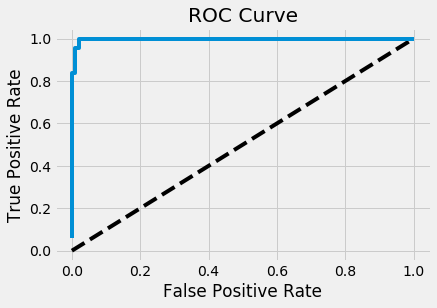

In [55]:
KNeighborsBagging(30)

0.8919956234672703


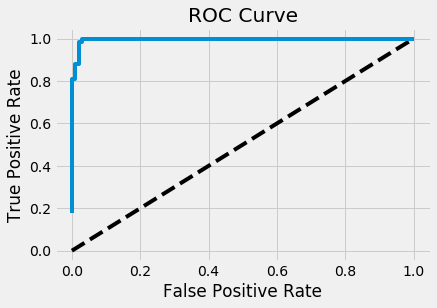

In [54]:
KNeighborsBagging(20)

0.899318442298861


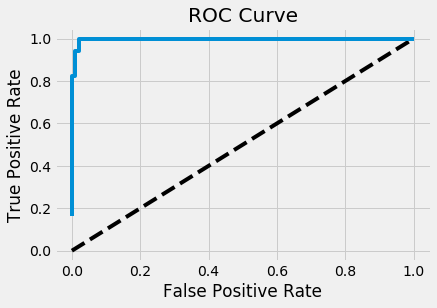

In [53]:
KNeighborsBagging(15)

0.9015371782339524


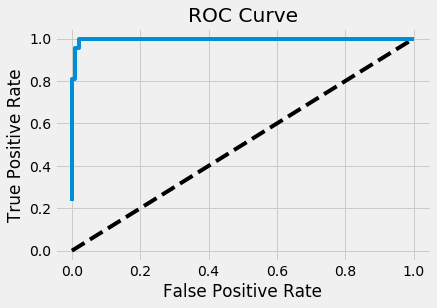

In [44]:
KNeighborsBagging(10)

0.9059210097580217


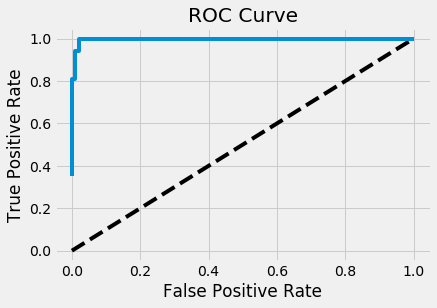

In [48]:
KNeighborsBagging(8)

0.9100169017090353


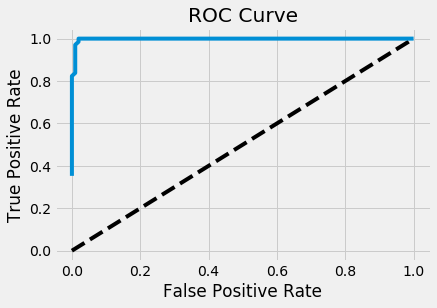

In [49]:
KNeighborsBagging(6)

0.9229754629867816


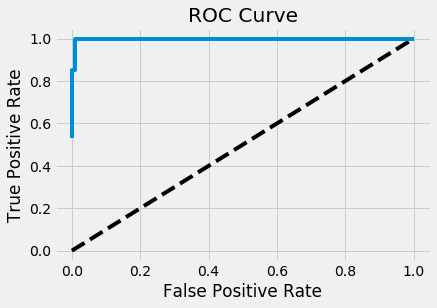

In [50]:
KNeighborsBagging(3)

0.9375925640102211


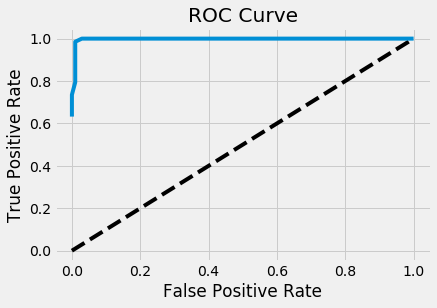

In [51]:
KNeighborsBagging(2)

0.9536389360498019


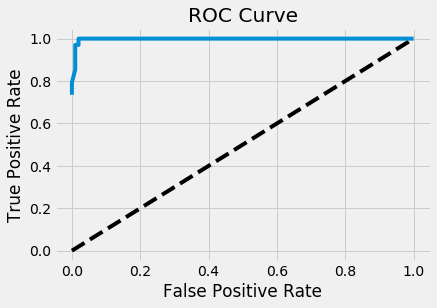

In [52]:
KNeighborsBagging(1)

In [62]:
resul = []
def KNeighborsBaggingResul(neigh):
    kn1= neighbors.KNeighborsRegressor(n_neighbors=neigh,weights='uniform')
    kn2= neighbors.KNeighborsRegressor(n_neighbors=neigh,weights='distance')
    bgg= BaggingRegressor(kn1,n_estimators=10,max_samples=0.7,max_features=0.9,verbose=0)#, max_features=0.5

    bgg.fit(X_train, y_train)

    resul.append(bgg.score(X_train, y_train))

xx = []
for i in range(1, 60):
    xx.append(i)
    KNeighborsBaggingResul(i)

Text(0,0.5,'accuracy')

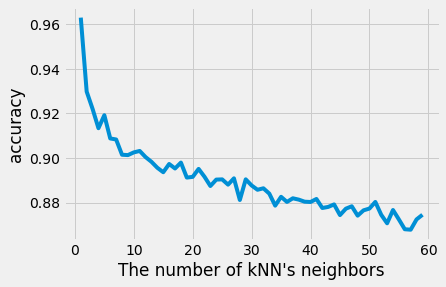

In [67]:
plt.plot(xx, resul,linestyle='-')
plt.xlabel('The number of kNN\'s neighbors')
plt.ylabel('accuracy')